In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import keras



from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Sequential, load_model
from keras.optimizers import Adam,SGD,RMSprop

In [10]:
picture_size = 48
folder_path = "/Users/ampxxmly/Downloads/archive"

In [2]:
%pip install matplotlib numpy pandas seaborn keras

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install tensorflow-macos
%pip install tensorflow-metal

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


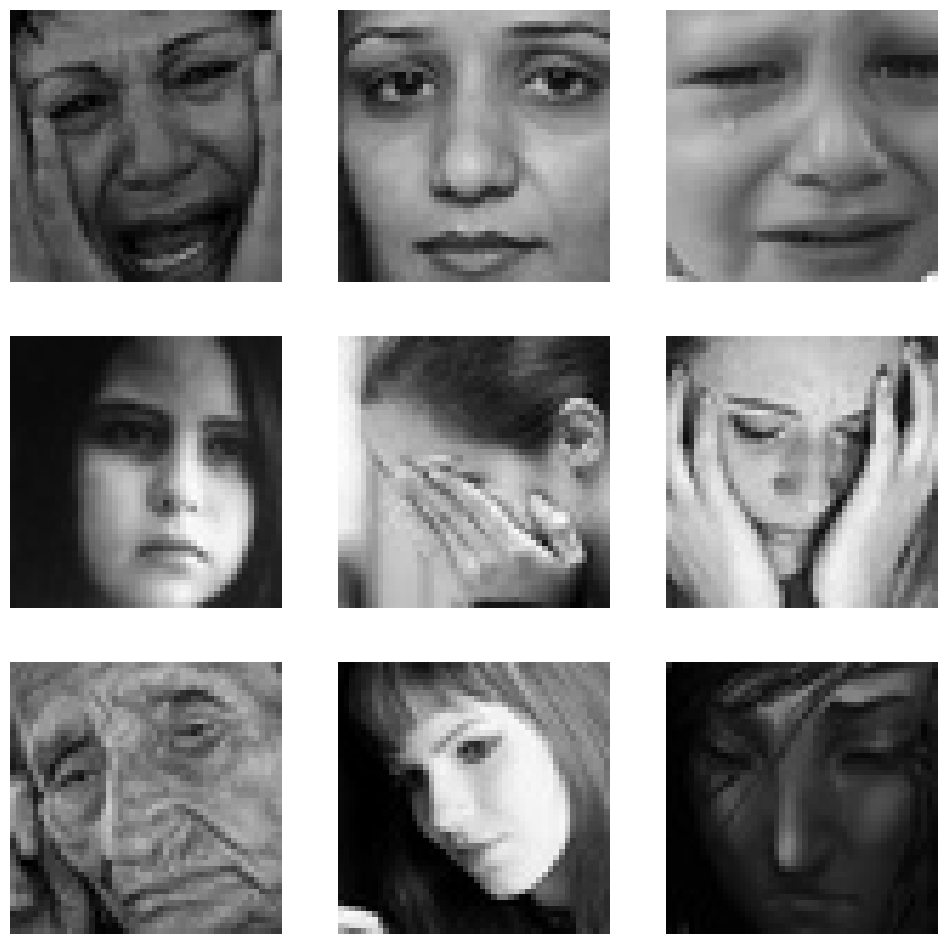

In [11]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

# กำหนดพาธของโฟลเดอร์
folder_path = "/Users/ampxxmly/Downloads/archive"  # แก้ไขให้ตรงตามที่เก็บไฟล์
expression = 'sad'
picture_size = 48

# ตรวจสอบว่าโฟลเดอร์ train และโฟลเดอร์ของ expression มีอยู่
train_folder_path = os.path.join(folder_path, "train")
expression_folder_path = os.path.join(train_folder_path, expression)

if not os.path.exists(train_folder_path):
    print(f"โฟลเดอร์ train ไม่พบ: {train_folder_path}")
elif not os.path.exists(expression_folder_path):
    print(f"โฟลเดอร์ expression ไม่พบ: {expression_folder_path}")
else:
    # แสดงภาพ
    image_files = os.listdir(expression_folder_path)

    plt.figure(figsize=(12, 12))
    for i in range(min(9, len(image_files))):  # จำกัดจำนวนภาพที่แสดงไว้ไม่เกิน 9
        plt.subplot(3, 3, i + 1)
        img_path = os.path.join(expression_folder_path, image_files[i])  # สร้างเส้นทางไฟล์
        img = load_img(img_path, target_size=(picture_size, picture_size))
        plt.imshow(img)
        plt.axis('off')  # ปิดการแสดงแกน
    plt.show()

In [12]:
import os
from keras.preprocessing.image import ImageDataGenerator

# กำหนดค่าพารามิเตอร์
batch_size = 128
picture_size = 48  # ขนาดของภาพ 48x48

# ระบุเส้นทางโฟลเดอร์
folder_path = "/Users/ampxxmly/Downloads/archive"
train_directory = os.path.join(folder_path, "train")
test_directory = os.path.join(folder_path, "test")

# ตรวจสอบโฟลเดอร์
if not os.path.exists(train_directory):
    raise FileNotFoundError(f"Train directory not found: {train_directory}")
if not os.path.exists(test_directory):
    raise FileNotFoundError(f"Test directory not found: {test_directory}")

print("Train directory exists:", os.path.exists(train_directory))
print("Test directory exists:", os.path.exists(test_directory))

# Image augmentation สำหรับ train set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image preprocessing สำหรับ validation/test set
datagen_val = ImageDataGenerator(rescale=1./255)

# โหลดข้อมูลจากโฟลเดอร์ train
train_set = datagen_train.flow_from_directory(
    train_directory,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# โหลดข้อมูลจากโฟลเดอร์ test
test_set = datagen_val.flow_from_directory(
    test_directory,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# แสดงข้อมูลเกี่ยวกับชุดข้อมูล
print(f"Number of classes in train set: {len(train_set.class_indices)}")
print(f"Number of classes in test set: {len(test_set.class_indices)}")

Train directory exists: True
Test directory exists: True
Found 28724 images belonging to 7 classes.
Found 7193 images belonging to 7 classes.
Number of classes in train set: 7
Number of classes in test set: 7


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, GlobalAveragePooling2D
from keras.regularizers import l2
from keras.optimizers import Adam

no_of_classes = 7

model = Sequential()

# 1st CNN Layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # ลด Dropout

# 2nd CNN Layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd CNN Layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # เพิ่ม Dropout สำหรับเลเยอร์ที่มีจำนวน filters สูง

# 4th CNN Layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Global Average Pooling (GAP)
model.add(GlobalAveragePooling2D())

# Fully Connected Layer 1
model.add(Dense(256, kernel_regularizer=l2(0.01)))  # เพิ่ม Regularization
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))  # เพิ่ม Dropout

# Fully Connected Layer 2
model.add(Dense(512, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(no_of_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0001)  # ลด Learning Rate
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [14]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.optimizers.legacy import Adam as LegacyAdam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=15,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list
)

Epoch 1/48


2024-12-06 14:52:00.229051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


224/224 [==============================] - ETA: 0s - loss: 8.3624 - accuracy: 0.2057

2024-12-06 14:52:53.673852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


224/224 [==============================] - 58s 244ms/step - loss: 8.3624 - accuracy: 0.2057 - val_loss: 7.6331 - val_accuracy: 0.2479 - lr: 1.0000e-04
Epoch 2/48
224/224 [==============================] - ETA: 0s - loss: 7.2416 - accuracy: 0.2217WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 58s 260ms/step - loss: 7.2416 - accuracy: 0.2217 - val_loss: 6.7199 - val_accuracy: 0.2241 - lr: 1.0000e-04
Epoch 3/48
224/224 [==============================] - ETA: 0s - loss: 6.3536 - accuracy: 0.2277WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 55s 247ms/step - loss: 6.3536 - accuracy: 0.2277 - val_loss: 5.9398 - val_accuracy: 0.2341 - lr: 1.0000e-04
Epoch 4/48
224/224 [==============================] - ETA: 0s - loss: 5.6188 - accuracy: 0.2284WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 56s 252ms/step - loss: 5.6188 - accuracy: 0.2284 - val_loss: 5.2923 - val_accuracy: 0.2487 - lr: 1.0000e-04
Epoch 5/48
224/224 [==============================] - ETA: 0s - loss: 4.9971 - accuracy: 0.2344WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 57s 253ms/step - loss: 4.9971 - accuracy: 0.2344 - val_loss: 4.7328 - val_accuracy: 0.2627 - lr: 1.0000e-04
Epoch 6/48
224/224 [==============================] - ETA: 0s - loss: 4.4822 - accuracy: 0.2359WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 56s 249ms/step - loss: 4.4822 - accuracy: 0.2359 - val_loss: 4.3698 - val_accuracy: 0.2667 - lr: 1.0000e-04
Epoch 7/48
224/224 [==============================] - ETA: 0s - loss: 4.0468 - accuracy: 0.2381WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 56s 249ms/step - loss: 4.0468 - accuracy: 0.2381 - val_loss: 3.9172 - val_accuracy: 0.2578 - lr: 1.0000e-04
Epoch 8/48
224/224 [==============================] - ETA: 0s - loss: 3.6884 - accuracy: 0.2417WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 56s 252ms/step - loss: 3.6884 - accuracy: 0.2417 - val_loss: 3.6764 - val_accuracy: 0.2550 - lr: 1.0000e-04
Epoch 9/48
224/224 [==============================] - ETA: 0s - loss: 3.3902 - accuracy: 0.2449WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 57s 256ms/step - loss: 3.3902 - accuracy: 0.2449 - val_loss: 3.3234 - val_accuracy: 0.2628 - lr: 1.0000e-04
Epoch 10/48
224/224 [==============================] - ETA: 0s - loss: 3.1403 - accuracy: 0.2460WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 64s 288ms/step - loss: 3.1403 - accuracy: 0.2460 - val_loss: 3.1382 - val_accuracy: 0.2564 - lr: 1.0000e-04
Epoch 11/48
224/224 [==============================] - ETA: 0s - loss: 2.9309 - accuracy: 0.2531WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 58s 258ms/step - loss: 2.9309 - accuracy: 0.2531 - val_loss: 2.9321 - val_accuracy: 0.2646 - lr: 1.0000e-04
Epoch 12/48
224/224 [==============================] - ETA: 0s - loss: 2.7607 - accuracy: 0.2519WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 68s 302ms/step - loss: 2.7607 - accuracy: 0.2519 - val_loss: 2.7357 - val_accuracy: 0.2578 - lr: 1.0000e-04
Epoch 13/48
224/224 [==============================] - ETA: 0s - loss: 2.6176 - accuracy: 0.2566WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 70s 313ms/step - loss: 2.6176 - accuracy: 0.2566 - val_loss: 2.6574 - val_accuracy: 0.2584 - lr: 1.0000e-04
Epoch 14/48
224/224 [==============================] - ETA: 0s - loss: 2.4937 - accuracy: 0.2601WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 307ms/step - loss: 2.4937 - accuracy: 0.2601 - val_loss: 2.4949 - val_accuracy: 0.2568 - lr: 1.0000e-04
Epoch 15/48
224/224 [==============================] - ETA: 0s - loss: 2.3996 - accuracy: 0.2598WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 70s 312ms/step - loss: 2.3996 - accuracy: 0.2598 - val_loss: 2.3816 - val_accuracy: 0.2814 - lr: 1.0000e-04
Epoch 16/48
224/224 [==============================] - ETA: 0s - loss: 2.3108 - accuracy: 0.2670WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 83s 371ms/step - loss: 2.3108 - accuracy: 0.2670 - val_loss: 2.3588 - val_accuracy: 0.2761 - lr: 1.0000e-04
Epoch 17/48
224/224 [==============================] - ETA: 0s - loss: 2.2402 - accuracy: 0.2688WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 68s 303ms/step - loss: 2.2402 - accuracy: 0.2688 - val_loss: 2.3135 - val_accuracy: 0.2740 - lr: 1.0000e-04
Epoch 18/48
224/224 [==============================] - ETA: 0s - loss: 2.1736 - accuracy: 0.2738WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 68s 304ms/step - loss: 2.1736 - accuracy: 0.2738 - val_loss: 2.1866 - val_accuracy: 0.2884 - lr: 1.0000e-04
Epoch 19/48
224/224 [==============================] - ETA: 0s - loss: 2.1195 - accuracy: 0.2770WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 64s 284ms/step - loss: 2.1195 - accuracy: 0.2770 - val_loss: 2.1035 - val_accuracy: 0.2987 - lr: 1.0000e-04
Epoch 20/48
224/224 [==============================] - ETA: 0s - loss: 2.0745 - accuracy: 0.2834WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 66s 293ms/step - loss: 2.0745 - accuracy: 0.2834 - val_loss: 2.1122 - val_accuracy: 0.2997 - lr: 1.0000e-04
Epoch 21/48
224/224 [==============================] - ETA: 0s - loss: 2.0260 - accuracy: 0.2875WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 72s 323ms/step - loss: 2.0260 - accuracy: 0.2875 - val_loss: 2.0818 - val_accuracy: 0.2871 - lr: 1.0000e-04
Epoch 22/48
224/224 [==============================] - ETA: 0s - loss: 1.9824 - accuracy: 0.3003WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 68s 303ms/step - loss: 1.9824 - accuracy: 0.3003 - val_loss: 2.0214 - val_accuracy: 0.3238 - lr: 1.0000e-04
Epoch 23/48
224/224 [==============================] - ETA: 0s - loss: 1.9486 - accuracy: 0.3044WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 310ms/step - loss: 1.9486 - accuracy: 0.3044 - val_loss: 1.9389 - val_accuracy: 0.3207 - lr: 1.0000e-04
Epoch 24/48
224/224 [==============================] - ETA: 0s - loss: 1.9152 - accuracy: 0.3107WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 68s 306ms/step - loss: 1.9152 - accuracy: 0.3107 - val_loss: 1.8876 - val_accuracy: 0.3496 - lr: 1.0000e-04
Epoch 25/48
224/224 [==============================] - ETA: 0s - loss: 1.8821 - accuracy: 0.3217WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 67s 298ms/step - loss: 1.8821 - accuracy: 0.3217 - val_loss: 1.8966 - val_accuracy: 0.3421 - lr: 1.0000e-04
Epoch 26/48
224/224 [==============================] - ETA: 0s - loss: 1.8527 - accuracy: 0.3240WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 66s 295ms/step - loss: 1.8527 - accuracy: 0.3240 - val_loss: 1.7557 - val_accuracy: 0.3884 - lr: 1.0000e-04
Epoch 27/48
224/224 [==============================] - ETA: 0s - loss: 1.8199 - accuracy: 0.3369WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 70s 311ms/step - loss: 1.8199 - accuracy: 0.3369 - val_loss: 1.6448 - val_accuracy: 0.4224 - lr: 1.0000e-04
Epoch 28/48
224/224 [==============================] - ETA: 0s - loss: 1.7956 - accuracy: 0.3476WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 309ms/step - loss: 1.7956 - accuracy: 0.3476 - val_loss: 2.0110 - val_accuracy: 0.3451 - lr: 1.0000e-04
Epoch 29/48
224/224 [==============================] - ETA: 0s - loss: 1.7662 - accuracy: 0.3569WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 71s 315ms/step - loss: 1.7662 - accuracy: 0.3569 - val_loss: 1.6743 - val_accuracy: 0.4191 - lr: 1.0000e-04
Epoch 30/48
224/224 [==============================] - ETA: 0s - loss: 1.7438 - accuracy: 0.3619WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 72s 319ms/step - loss: 1.7438 - accuracy: 0.3619 - val_loss: 1.6650 - val_accuracy: 0.3993 - lr: 1.0000e-04
Epoch 31/48
224/224 [==============================] - ETA: 0s - loss: 1.7268 - accuracy: 0.3676WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 309ms/step - loss: 1.7268 - accuracy: 0.3676 - val_loss: 1.5623 - val_accuracy: 0.4442 - lr: 1.0000e-04
Epoch 32/48
224/224 [==============================] - ETA: 0s - loss: 1.7019 - accuracy: 0.3770WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 306ms/step - loss: 1.7019 - accuracy: 0.3770 - val_loss: 1.5746 - val_accuracy: 0.4463 - lr: 1.0000e-04
Epoch 33/48
224/224 [==============================] - ETA: 0s - loss: 1.6824 - accuracy: 0.3804WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 72s 320ms/step - loss: 1.6824 - accuracy: 0.3804 - val_loss: 1.5906 - val_accuracy: 0.4238 - lr: 1.0000e-04
Epoch 34/48
224/224 [==============================] - ETA: 0s - loss: 1.6695 - accuracy: 0.3877WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 67s 299ms/step - loss: 1.6695 - accuracy: 0.3877 - val_loss: 1.6680 - val_accuracy: 0.4150 - lr: 1.0000e-04
Epoch 35/48
224/224 [==============================] - ETA: 0s - loss: 1.6480 - accuracy: 0.3896WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 64s 286ms/step - loss: 1.6480 - accuracy: 0.3896 - val_loss: 1.4824 - val_accuracy: 0.4675 - lr: 1.0000e-04
Epoch 36/48
224/224 [==============================] - ETA: 0s - loss: 1.6358 - accuracy: 0.3965WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 67s 299ms/step - loss: 1.6358 - accuracy: 0.3965 - val_loss: 1.5616 - val_accuracy: 0.4406 - lr: 1.0000e-04
Epoch 37/48
224/224 [==============================] - ETA: 0s - loss: 1.6224 - accuracy: 0.3991WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 311ms/step - loss: 1.6224 - accuracy: 0.3991 - val_loss: 1.5551 - val_accuracy: 0.4336 - lr: 1.0000e-04
Epoch 38/48
224/224 [==============================] - ETA: 0s - loss: 1.6070 - accuracy: 0.4046WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 70s 315ms/step - loss: 1.6070 - accuracy: 0.4046 - val_loss: 1.6856 - val_accuracy: 0.4124 - lr: 1.0000e-04
Epoch 39/48
224/224 [==============================] - ETA: 0s - loss: 1.5928 - accuracy: 0.4098WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 307ms/step - loss: 1.5928 - accuracy: 0.4098 - val_loss: 1.4085 - val_accuracy: 0.4923 - lr: 1.0000e-04
Epoch 40/48
224/224 [==============================] - ETA: 0s - loss: 1.5809 - accuracy: 0.4139WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 72s 321ms/step - loss: 1.5809 - accuracy: 0.4139 - val_loss: 1.4296 - val_accuracy: 0.4806 - lr: 1.0000e-04
Epoch 41/48
224/224 [==============================] - ETA: 0s - loss: 1.5691 - accuracy: 0.4165WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 310ms/step - loss: 1.5691 - accuracy: 0.4165 - val_loss: 1.4587 - val_accuracy: 0.4678 - lr: 1.0000e-04
Epoch 42/48
224/224 [==============================] - ETA: 0s - loss: 1.5602 - accuracy: 0.4211WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 73s 328ms/step - loss: 1.5602 - accuracy: 0.4211 - val_loss: 1.4108 - val_accuracy: 0.4873 - lr: 1.0000e-04
Epoch 43/48
224/224 [==============================] - ETA: 0s - loss: 1.5500 - accuracy: 0.4209WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 308ms/step - loss: 1.5500 - accuracy: 0.4209 - val_loss: 1.4733 - val_accuracy: 0.4727 - lr: 1.0000e-04
Epoch 44/48
224/224 [==============================] - ETA: 0s - loss: 1.5435 - accuracy: 0.4298WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 44: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
224/224 [==============================] - 68s 302ms/step - loss: 1.5435 - accuracy: 0.4298 - val_loss: 1.5203 - val_accuracy: 0.4541 - lr: 1.0000e-04
Epoch 45/48
224/224 [==============================] - ETA: 0s - loss: 1.5209 - accuracy: 0.4361WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 310ms/step - loss: 1.5209 - accuracy: 0.4361 - val_loss: 1.3390 - val_accuracy: 0.5106 - lr: 1.0000e-05
Epoch 46/48
224/224 [==============================] - ETA: 0s - loss: 1.5092 - accuracy: 0.4421WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 72s 321ms/step - loss: 1.5092 - accuracy: 0.4421 - val_loss: 1.3309 - val_accuracy: 0.5138 - lr: 1.0000e-05
Epoch 47/48
224/224 [==============================] - ETA: 0s - loss: 1.5032 - accuracy: 0.4435WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 69s 308ms/step - loss: 1.5032 - accuracy: 0.4435 - val_loss: 1.3167 - val_accuracy: 0.5202 - lr: 1.0000e-05
Epoch 48/48
224/224 [==============================] - ETA: 0s - loss: 1.4920 - accuracy: 0.4469WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 74s 331ms/step - loss: 1.4920 - accuracy: 0.4469 - val_loss: 1.3243 - val_accuracy: 0.5138 - lr: 1.0000e-05


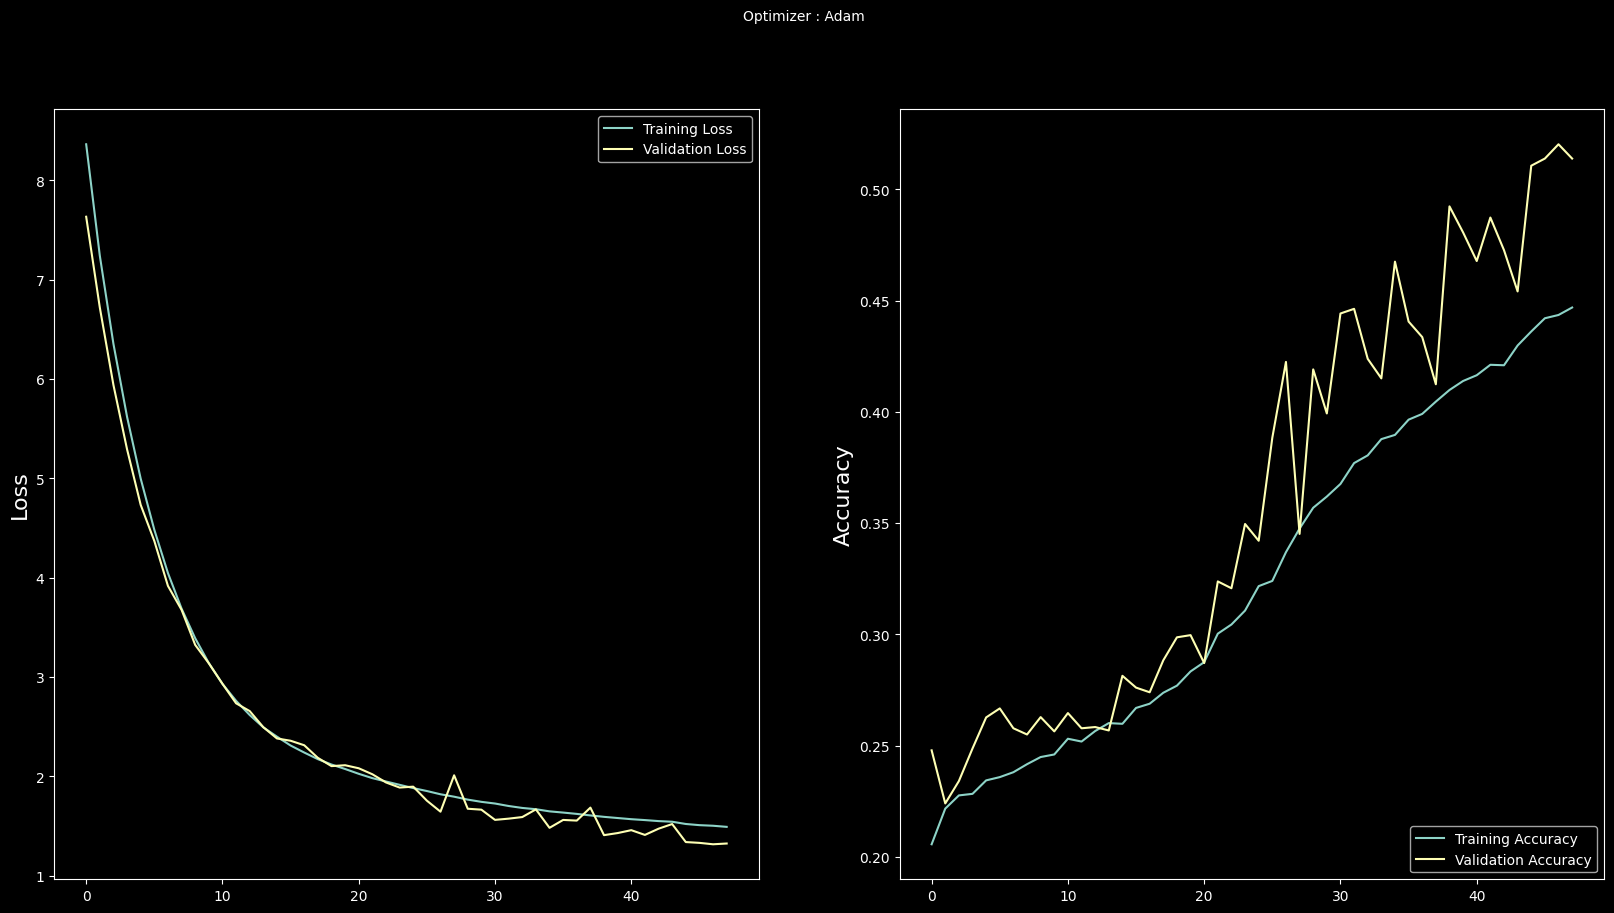

In [16]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [17]:
import os
os.makedirs('models/')
model.save('models/model.h5')

/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
